In [37]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,360 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144618 files and d

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager as fm
from matplotlib import rcParams
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from matplotlib import font_manager, rc

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
elementary = pd.read_csv('/content/drive/My Drive/Colab Notebooks/elementary.csv')
parking = pd.read_csv('/content/drive/My Drive/Colab Notebooks/parking.csv')
total = pd.read_csv('/content/drive/My Drive/Colab Notebooks/total.csv')
all = pd.read_csv('/content/drive/My Drive/project/seoul_contest/total_합치기.csv')

In [3]:
df = all[['행정동코드','5~14세']]
df

,행정동코드,5~14세
0,1111051500,2857
1,1111053000,3331
2,1111054000,1636
3,1111055000,454
4,1111056000,734
...,...,...
420,1174065000,736
421,1174066000,1174
422,1174068500,675
423,1174069000,1720


In [4]:
elementary

,Unnamed: 0,행정동,학급수 계,학생수 계,총교원수 계,교실수,학교수 계
0,0,가락동,205.0,4224.0,319.0,244.0,6
1,1,가리봉동,22.0,317.0,37.0,38.0,1
2,2,가양동,72.0,1174.0,116.0,98.0,3
3,3,가회동,12.0,209.0,20.0,18.0,1
4,4,갈현동,71.0,1696.0,110.0,93.0,2
...,...,...,...,...,...,...,...
210,210,효제동,14.0,212.0,30.0,30.0,1
211,211,효창동,36.0,731.0,54.0,44.0,1
212,212,후암동,44.0,756.0,74.0,59.0,2
213,213,휘경동,55.0,1111.0,84.0,87.0,2


In [5]:
parking

,Unnamed: 0,동,자치구_x,계,자치구_y,합계(개소),합계(면수),합계(공영개수),합계(공영면수),합계(민영개수),합계(민영면수),1인당 주차면적
0,0,가락1동,송파구,28065,송파구,83,20942,27,"1,010",56,"19,932",0.746196
1,1,가락2동,송파구,33503,송파구,"1,058",14340,27,"1,123","1,031","13,217",0.428021
2,2,가락본동,송파구,27715,송파구,"1,049",14368,2,132,"1,047","14,236",0.518420
3,3,가리봉동,구로구,15062,구로구,358,2500,5,289,353,"2,211",0.165981
4,4,가산동,금천구,24830,금천구,775,48560,16,825,759,"47,735",1.955699
...,...,...,...,...,...,...,...,...,...,...,...,...
421,421,효창동,용산구,10387,용산구,351,3931,27,388,324,"3,543",0.378454
422,422,후암동,용산구,18354,용산구,747,4600,27,249,720,"4,351",0.250627
423,423,휘경1동,동대문구,15421,동대문구,459,4474,24,319,435,"4,155",0.290124
424,424,휘경2동,동대문구,25132,동대문구,810,11108,3,280,807,"10,828",0.441986


In [54]:
ally = pd.merge(df.set_index('행정동코드'),total.set_index('행정동코드'),right_index=True,left_index=True)
a = ally.drop(['행정동'],axis=1)
ally

,5~14세,Unnamed: 0,시군구명,행정동명,병원수,도서관,박물관/미술관,지하철역,버스정류장,유통개수,공동주택_개수,공동주택_건축면적(㎡),공동주택_건폐율(%),공동주택_연면적(㎡),공동주택_용적률(%),공동주택_세대수,공동주택_가구수,공장_개수,공장_건축면적(㎡),행정동,총전입,총전출,구내전입,구내전출,구간전입,구간전출,시ㆍ도간전입,시ㆍ도간전출
행정동코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1111051500,2857,0,종로구,청운효자동,6,3.0,1.0,0.0,25.0,0,379,125.269681,52.555743,191.928277,964.553177,7.379947,0.005277,1.0,0.00,청운효자동,1457.0,1780.0,262.0,336.0,649.0,850.0,546,594.0
1111053000,3331,1,종로구,사직동,37,0.0,5.0,2.0,24.0,1,98,348.211020,44.991429,153.290797,3228.286531,17.010204,0.071429,4.0,0.00,사직동,1615.0,1631.0,288.0,345.0,827.0,829.0,500,457.0
1111054000,1636,2,종로구,삼청동,86,1.0,7.0,0.0,23.0,0,14,203.559286,34.089286,113.165714,746.249643,4.357143,0.000000,2.0,0.00,삼청동,342.0,414.0,82.0,83.0,135.0,191.0,125,140.0
1111055000,454,3,종로구,부암동,12,0.0,5.0,0.0,60.0,0,246,124.504472,24.580998,61.007185,902.087581,6.914634,0.069106,1.0,0.00,부암동,1239.0,1300.0,270.0,243.0,628.0,633.0,341,424.0
1111056000,734,4,종로구,평창동,65,1.0,6.0,0.0,34.0,5,454,389.523883,20.485875,59.479189,1422.534819,8.856828,0.002203,2.0,0.00,평창동,1938.0,2210.0,303.0,233.0,980.0,1163.0,655,814.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174065000,736,420,강동구,성내제2동,12,0.0,0.0,1.0,25.0,0,1247,193.674798,46.141739,178.642433,1268.791290,13.827586,0.003208,0.0,0.00,성내제2동,3997.0,4595.0,1210.0,1741.0,1514.0,1243.0,1273,1611.0
1174066000,1174,421,강동구,성내제3동,15,1.0,0.0,1.0,25.0,0,1247,193.674798,46.141739,178.642433,1268.791290,13.827586,0.003208,0.0,0.00,성내제3동,3390.0,3718.0,1130.0,1405.0,1224.0,859.0,1036,1454.0
1174068500,675,422,강동구,길동,28,0.0,0.0,1.0,16.0,0,683,232.939603,41.283617,176.225471,1810.938666,20.751098,0.055637,0.0,0.00,길동,6302.0,7127.0,2103.0,2705.0,1905.0,1556.0,2294,2866.0


In [7]:
# a.to_csv('total(초등학교,주차제외).csv')

In [8]:
forest_reg = RandomForestRegressor(1000, max_depth=6, random_state=42, n_jobs=-1)

In [55]:
x,y = a.iloc[:,4:], a.iloc[:,0]

In [10]:
def rmse(pred, true):
    return -np.sqrt(np.mean((np.expm1(pred)-np.expm1(true))**2))

def evaluate_lgbm(x_data, y_data):
    model = LGBMRegressor(objective='regression', num_iterations=10**5)
    x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, random_state=0)
    model.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=100, verbose=False)
    val_pred = model.predict(x_val)
    score = rmse(val_pred, y_val)
    return score
  

def evaluate_reg(x_data, y_data):
    forest_reg = RandomForestRegressor(1000, max_depth=6, random_state=42)#, n_jobs=-1)
    x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, random_state=0)
    forest_reg.fit(x_train, y_train)
    val_pred = forest_reg.predict(x_val)
    score = rmse(val_pred, y_val)

    return score

In [56]:
x,y = a.iloc[:,4:], a.iloc[:,0]
scaler = MinMaxScaler()
# scaler = StandardScaler()
X_scaled_all = scaler.fit_transform(x)

In [64]:
x_train_, x_test_, Y_train_, Y_test_ = train_test_split(X_scaled_all, y, random_state=42, test_size=0.3)
forest_reg.fit(x_train_, Y_train_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [65]:
print("훈련 세트 정확도: {:.5f}".format(forest_reg.score(x_train_, Y_train_)))
print("테스트 세트 정확도: {:.5f}".format(forest_reg.score(x_test_, Y_test_)))

훈련 세트 정확도: 0.59851
테스트 세트 정확도: -0.06814


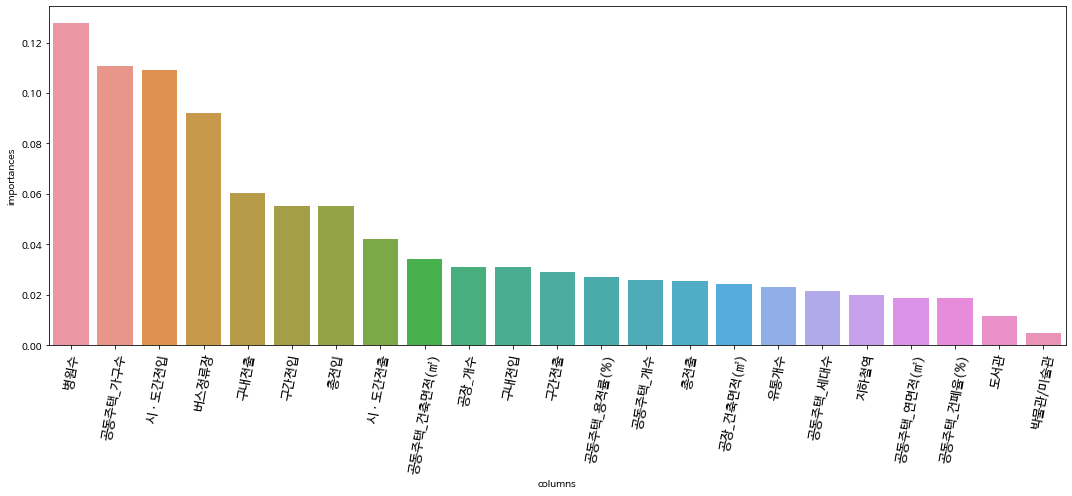

In [66]:
feature_importance = forest_reg.feature_importances_

# plot
df_fi = pd.DataFrame({'columns':x.columns, 'importances':feature_importance})
df_fi = df_fi[df_fi['importances'] > 0] # importance가 0이상인 것만 
df_fi = df_fi.sort_values(by=['importances'], ascending=False)

fig = plt.figure(figsize=(15,7))
ax = sns.barplot(df_fi['columns'], df_fi['importances'])
ax.set_xticklabels(df_fi['columns'], rotation=80, fontsize=13)
plt.tight_layout()
plt.rc('font', family='NanumBarunGothic') 
plt.show()

In [63]:
# rfe = RFE(forest_reg, 8)
# fit = rfe.fit(x, y)

# print("Num Features: %d") % fit.n_features_
# print("Selected Features: %s") % fit.support_
# print("Feature Ranking: %s") % fit.ranking_

Num Features: %d


TypeError: ignored

In [74]:

##########모델 생성

model = RandomForestRegressor()
# scaler = MinMaxScaler()
# X_ = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=777)


##########모델 학습

model.fit(x_train, y_train)

##########모델 검증


print("훈련 세트 정확도: {:.5f}".format(model.score(x_train, y_train)))
print("테스트 세트 정확도: {:.5f}".format(model.score(x_test, y_test)))
# print(model.score(x_train, y_train))
# print(model.score(x_test, y_test)) 


훈련 세트 정확도: 0.85778
테스트 세트 정확도: -0.04773


In [61]:
##########모델 예측

y_predict = model.predict(x_test)
print(y_predict[0]) #7.1

1242.24


## 체육시설 어린이 보호구역 포함

In [20]:
all = pd.read_csv('/content/drive/My Drive/project/seoul_contest/체육시설_어린이보호구역_행정동.csv')

In [79]:
df_ = pd.merge(ally,all.set_index('행정동코드'),left_index=True,right_index=True)
df_.drop(['Unnamed: 0_x',	'시군구명_x',	'행정동명','행정동','Unnamed: 0_y'],axis=1,inplace=True)
df_

,5~14세,병원수,도서관,박물관/미술관,지하철역,버스정류장,유통개수,공동주택_개수,공동주택_건축면적(㎡),공동주택_건폐율(%),공동주택_연면적(㎡),공동주택_용적률(%),공동주택_세대수,공동주택_가구수,공장_개수,공장_건축면적(㎡),총전입,총전출,구내전입,구내전출,구간전입,구간전출,시ㆍ도간전입,시ㆍ도간전출,구동,시군구명_y,읍면동명,동,동인구수,체육시설 수,어린이보호구역
행정동코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1111051500,2857,6,3.0,1.0,0.0,25.0,0,379,125.269681,52.555743,191.928277,964.553177,7.379947,0.005277,1.0,0.00,1457.0,1780.0,262.0,336.0,649.0,850.0,546,594.0,종로구청운효자동,종로구,청운효자동,청운효자동,"12,855",0.0,7
1111053000,3331,37,0.0,5.0,2.0,24.0,1,98,348.211020,44.991429,153.290797,3228.286531,17.010204,0.071429,4.0,0.00,1615.0,1631.0,288.0,345.0,827.0,829.0,500,457.0,종로구사직동,종로구,사직동,사직동,"9,787",3.0,3
1111054000,1636,86,1.0,7.0,0.0,23.0,0,14,203.559286,34.089286,113.165714,746.249643,4.357143,0.000000,2.0,0.00,342.0,414.0,82.0,83.0,135.0,191.0,125,140.0,종로구삼청동,종로구,삼청동,삼청동,"2,973",1.0,0
1111055000,454,12,0.0,5.0,0.0,60.0,0,246,124.504472,24.580998,61.007185,902.087581,6.914634,0.069106,1.0,0.00,1239.0,1300.0,270.0,243.0,628.0,633.0,341,424.0,종로구부암동,종로구,부암동,부암동,"10,421",0.0,5
1111056000,734,65,1.0,6.0,0.0,34.0,5,454,389.523883,20.485875,59.479189,1422.534819,8.856828,0.002203,2.0,0.00,1938.0,2210.0,303.0,233.0,980.0,1163.0,655,814.0,종로구평창동,종로구,평창동,평창동,"18,696",0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174065000,736,12,0.0,0.0,1.0,25.0,0,1247,193.674798,46.141739,178.642433,1268.791290,13.827586,0.003208,0.0,0.00,3997.0,4595.0,1210.0,1741.0,1514.0,1243.0,1273,1611.0,강동구성내2동,강동구,성내제2동,성내2동,"25,096",0.0,0
1174066000,1174,15,1.0,0.0,1.0,25.0,0,1247,193.674798,46.141739,178.642433,1268.791290,13.827586,0.003208,0.0,0.00,3390.0,3718.0,1130.0,1405.0,1224.0,859.0,1036,1454.0,강동구성내3동,강동구,성내제3동,성내3동,"23,824",0.0,3
1174068500,675,28,0.0,0.0,1.0,16.0,0,683,232.939603,41.283617,176.225471,1810.938666,20.751098,0.055637,0.0,0.00,6302.0,7127.0,2103.0,2705.0,1905.0,1556.0,2294,2866.0,강동구길동,강동구,길동,길동,"46,950",0.0,10


In [34]:
df_ = df_[['5~14세', '병원수', '도서관', '박물관/미술관', '지하철역', '버스정류장', '유통개수', '공동주택_개수',
       '공동주택_건축면적(㎡)', '공동주택_건폐율(%)', '공동주택_연면적(㎡)', '공동주택_용적률(%)', '공동주택_세대수',
       '공동주택_가구수', '공장_개수', '공장_건축면적(㎡)', '총전입', '총전출', '구내전입', '구내전출', '구간전입',
       '구간전출', '시ㆍ도간전입', '시ㆍ도간전출','체육시설 수', '어린이보호구역', '구동', '시군구명_y', '읍면동명', '동', '동인구수']]

In [36]:
# x,y = a.iloc[:,4:], a.iloc[:,0]
x_all,y_all = df_.iloc[:,1:-5],df_.iloc[:,0]

In [35]:
df_.iloc[:,1:-5]

,병원수,도서관,박물관/미술관,지하철역,버스정류장,유통개수,공동주택_개수,공동주택_건축면적(㎡),공동주택_건폐율(%),공동주택_연면적(㎡),공동주택_용적률(%),공동주택_세대수,공동주택_가구수,공장_개수,공장_건축면적(㎡),총전입,총전출,구내전입,구내전출,구간전입,구간전출,시ㆍ도간전입,시ㆍ도간전출,체육시설 수,어린이보호구역
행정동코드,,,,,,,,,,,,,,,,,,,,,,,,,
1111051500,6,3.0,1.0,0.0,25.0,0,379,125.269681,52.555743,191.928277,964.553177,7.379947,0.005277,1.0,0.00,1457.0,1780.0,262.0,336.0,649.0,850.0,546,594.0,0.0,7
1111053000,37,0.0,5.0,2.0,24.0,1,98,348.211020,44.991429,153.290797,3228.286531,17.010204,0.071429,4.0,0.00,1615.0,1631.0,288.0,345.0,827.0,829.0,500,457.0,3.0,3
1111054000,86,1.0,7.0,0.0,23.0,0,14,203.559286,34.089286,113.165714,746.249643,4.357143,0.000000,2.0,0.00,342.0,414.0,82.0,83.0,135.0,191.0,125,140.0,1.0,0
1111055000,12,0.0,5.0,0.0,60.0,0,246,124.504472,24.580998,61.007185,902.087581,6.914634,0.069106,1.0,0.00,1239.0,1300.0,270.0,243.0,628.0,633.0,341,424.0,0.0,5
1111056000,65,1.0,6.0,0.0,34.0,5,454,389.523883,20.485875,59.479189,1422.534819,8.856828,0.002203,2.0,0.00,1938.0,2210.0,303.0,233.0,980.0,1163.0,655,814.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174065000,12,0.0,0.0,1.0,25.0,0,1247,193.674798,46.141739,178.642433,1268.791290,13.827586,0.003208,0.0,0.00,3997.0,4595.0,1210.0,1741.0,1514.0,1243.0,1273,1611.0,0.0,0
1174066000,15,1.0,0.0,1.0,25.0,0,1247,193.674798,46.141739,178.642433,1268.791290,13.827586,0.003208,0.0,0.00,3390.0,3718.0,1130.0,1405.0,1224.0,859.0,1036,1454.0,0.0,3
1174068500,28,0.0,0.0,1.0,16.0,0,683,232.939603,41.283617,176.225471,1810.938666,20.751098,0.055637,0.0,0.00,6302.0,7127.0,2103.0,2705.0,1905.0,1556.0,2294,2866.0,0.0,10


In [76]:
model1 = RandomForestRegressor(1000,random_state=42,n_jobs = -1)
scaler = MinMaxScaler()
X_all = scaler.fit_transform(x_all)
x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(x_all, y_all, test_size=0.3, random_state=42)


##########모델 학습

model1.fit(x_train_all, y_train_all)

##########모델 검증



print("훈련 세트 정확도: {:.5f}".format(model1.score(x_train_all, y_train_all)))
print("테스트 세트 정확도: {:.5f}".format(model1.score(x_test_all, y_test_all)))
# print(model1.score(x_train_all, y_train_all)) 
# print(model1.score(x_test_all, y_test_all))

훈련 세트 정확도: 0.85802
테스트 세트 정확도: -0.08974


In [42]:
y_predict = model1.predict(x_test_all)
print(y_predict[0])

1575.572


In [43]:
x_all.columns

Index(['병원수', '도서관', '박물관/미술관', '지하철역', '버스정류장', '유통개수', '공동주택_개수',
       '공동주택_건축면적(㎡)', '공동주택_건폐율(%)', '공동주택_연면적(㎡)', '공동주택_용적률(%)', '공동주택_세대수',
       '공동주택_가구수', '공장_개수', '공장_건축면적(㎡)', '총전입', '총전출', '구내전입', '구내전출', '구간전입',
       '구간전출', '시ㆍ도간전입', '시ㆍ도간전출', '체육시설 수', '어린이보호구역'],
      dtype='object')

In [39]:
feature_importance = model1.feature_importances_


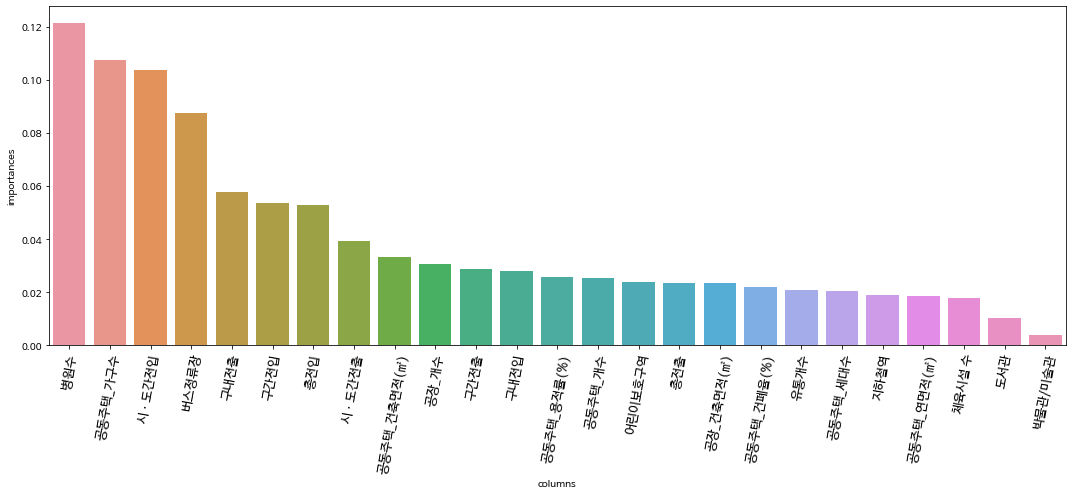

In [40]:

# plot
df_f = pd.DataFrame({'columns':x_all.columns, 'importances':feature_importance})
df_f = df_f[df_f['importances'] > 0] # importance가 0이상인 것만 
df_i = df_f.sort_values(by=['importances'], ascending=False)

fig = plt.figure(figsize=(15,7))
ax = sns.barplot(df_i['columns'], df_i['importances'])
ax.set_xticklabels(df_i['columns'], rotation=80, fontsize=13)
plt.tight_layout()
plt.rc('font', family='NanumBarunGothic') 
plt.show()

In [46]:
from sklearn.feature_selection import RFE


selector = RFE(model1, 20, step=1)
selector.fit(x_train_all,y_train_all)


RFE(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                    criterion='mse', max_depth=None,
                                    max_features='auto', max_leaf_nodes=None,
                                    max_samples=None, min_impurity_decrease=0.0,
                                    min_impurity_split=None, min_samples_leaf=1,
                                    min_samples_split=2,
                                    min_weight_fraction_leaf=0.0,
                                    n_estimators=1000, n_jobs=-1,
                                    oob_score=False, random_state=42, verbose=0,
                                    warm_start=False),
    n_features_to_select=20, step=1, verbose=0)

In [47]:

# print(selector.score(x_train_all, y_train_all))
# print(selector.score(x_test_all, y_test_all)) 

0.8561091880673934
-0.1050103890159324


## feature importance Top10 만 모델링 
### test 음수 벗어남

- 5~14세
- 병원수
- 지하철역 
- 버스정류장
- 공동주택_개수
- 구내전출
- 시ㆍ도간전출
- 공장_개수

In [67]:
top10 = df_[['5~14세', '병원수','지하철역', '버스정류장','공동주택_개수', '구내전출','구간전입','공동주택_건축면적(㎡)','시ㆍ도간전출','공장_개수']]
x_t,y_t = top10.iloc[:,1:],top10.iloc[:,0]
# top10.iloc[:,1:]

In [77]:

rf = RandomForestRegressor(1000,random_state=42,n_jobs = -1)
scaler = MinMaxScaler()
X_t = scaler.fit_transform(x_t)
x_train_t, x_test_t, y_train_t, y_test_t = train_test_split(x_t, y_t, test_size=0.2, random_state=42)


##########모델 학습

rf.fit(x_train_t, y_train_t)

##########모델 검증



print("훈련 세트 정확도: {:.5f}".format(rf.score(x_train_t, y_train_t)))
print("테스트 세트 정확도: {:.5f}".format(rf.score(x_test_t, y_test_t)))
# print(rf.score(x_train_t, y_train_t))
# print(rf.score(x_test_t, y_test_t))

훈련 세트 정확도: 0.85424
테스트 세트 정확도: 0.04752


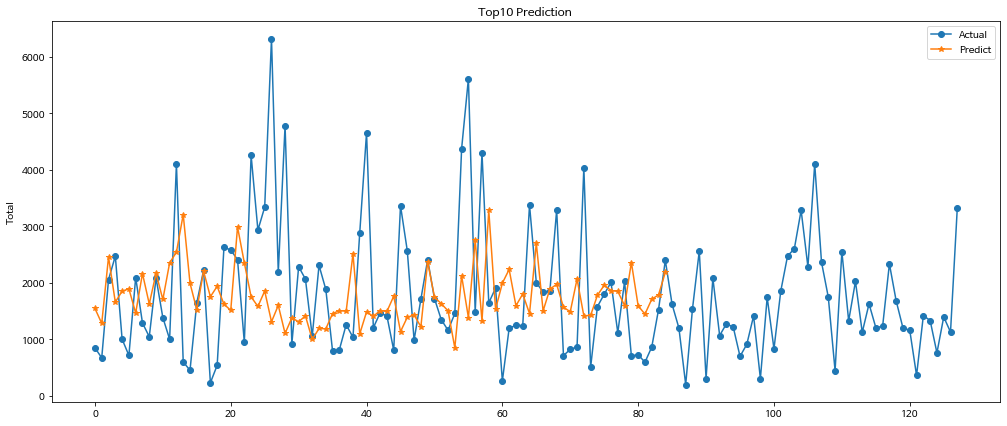

In [72]:
# 예측값과 실제값 그래프 출력 
pred_train = rf.predict(x_train_t)
pred_val = rf.predict(x_test_t)

plt.figure(figsize=(17,7))
plt.plot(range(0, len(y_test)), y_test,'o-', label='Actual')
plt.plot(range(0, len(pred_val)), pred_val, '*-', label='Predict')
plt.title('Top10 Prediction ')
plt.ylabel('Total')
plt.legend()